In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'y dataset')

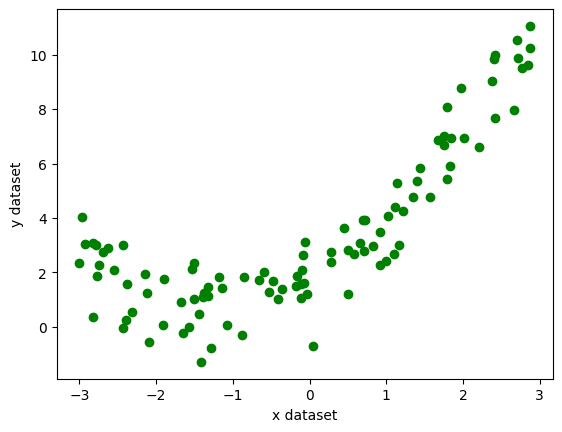

In [3]:
x = 6*np.random.rand(100,1)-3
y = 0.5*x**2+1.5*x+2+np.random.randn(100,1)
#quadratic equation used y=0.5x^2 + 1.5x + 2 + ouliner
plt.scatter(x,y,color = 'g')
plt.xlabel('x dataset')
plt.ylabel('y dataset')

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [5]:
#lets implement a simple linear regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [6]:
regression_1.fit(x_train,y_train)

LinearRegression()

In [7]:
from sklearn.metrics import r2_score
score = r2_score(y_test,regression_1.predict(x_test))
print(score)

0.6339055197037355


Text(0, 0.5, 'y dataset')

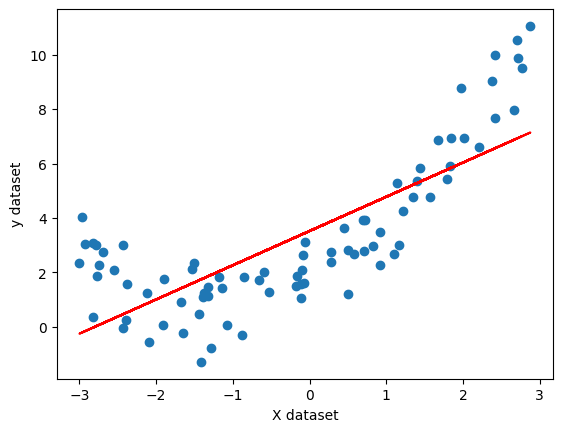

In [8]:
#vizualizing the model
plt.plot(x_train,regression_1.predict(x_train),color = 'r')
plt.scatter(x_train,y_train)
plt.xlabel("X dataset")
plt.ylabel("y dataset")

In [9]:
#applying polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly = PolynomialFeatures(degree = 2,include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [11]:
x_train_poly


array([[ 1.00000000e+00, -1.50183837e+00,  2.25551849e+00],
       [ 1.00000000e+00,  2.37787127e+00,  5.65427179e+00],
       [ 1.00000000e+00,  1.09409828e+00,  1.19705104e+00],
       [ 1.00000000e+00, -1.07271803e-01,  1.15072398e-02],
       [ 1.00000000e+00, -1.90653245e+00,  3.63486597e+00],
       [ 1.00000000e+00,  2.76433021e+00,  7.64152150e+00],
       [ 1.00000000e+00,  2.41389809e+00,  5.82690397e+00],
       [ 1.00000000e+00, -2.93211467e+00,  8.59729644e+00],
       [ 1.00000000e+00, -2.96389456e+00,  8.78467095e+00],
       [ 1.00000000e+00,  1.84909535e+00,  3.41915360e+00],
       [ 1.00000000e+00,  1.43588446e+00,  2.06176418e+00],
       [ 1.00000000e+00, -2.54461333e+00,  6.47505699e+00],
       [ 1.00000000e+00, -2.82010022e+00,  7.95296526e+00],
       [ 1.00000000e+00, -1.90025950e+00,  3.61098617e+00],
       [ 1.00000000e+00,  4.46026093e-01,  1.98939275e-01],
       [ 1.00000000e+00, -6.55685340e-01,  4.29923264e-01],
       [ 1.00000000e+00, -1.41264697e+00

In [12]:
x_test_poly

array([[ 1.00000000e+00, -1.57455939e+00,  2.47923728e+00],
       [ 1.00000000e+00, -2.14224725e+00,  4.58922326e+00],
       [ 1.00000000e+00,  9.93333338e-01,  9.86711121e-01],
       [ 1.00000000e+00, -3.64937220e-01,  1.33179174e-01],
       [ 1.00000000e+00, -2.63019946e+00,  6.91794921e+00],
       [ 1.00000000e+00, -2.80255649e-02,  7.85432290e-04],
       [ 1.00000000e+00,  1.75730920e+00,  3.08813562e+00],
       [ 1.00000000e+00,  1.10730515e+00,  1.22612469e+00],
       [ 1.00000000e+00,  2.84428178e+00,  8.08993884e+00],
       [ 1.00000000e+00,  2.86850333e+00,  8.22831134e+00],
       [ 1.00000000e+00,  2.40770631e+00,  5.79704970e+00],
       [ 1.00000000e+00, -2.31458718e+00,  5.35731384e+00],
       [ 1.00000000e+00, -4.16418710e-01,  1.73404542e-01],
       [ 1.00000000e+00,  1.79398979e+00,  3.21839936e+00],
       [ 1.00000000e+00,  1.75685266e+00,  3.08653129e+00],
       [ 1.00000000e+00, -4.81446926e-01,  2.31791143e-01],
       [ 1.00000000e+00,  1.01927285e+00

In [13]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(x_train_poly,y_train)
y_pred = regression.predict(x_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.9160290512395215


In [14]:
print(regression.coef_)

[[0.         1.4434694  0.56099586]]


In [15]:
print(regression.intercept_)

[1.82829958]


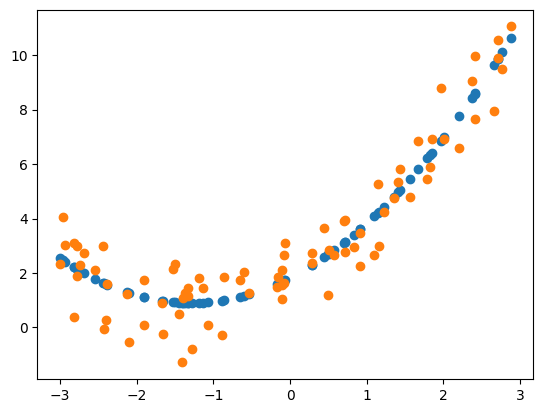

In [16]:
plt.scatter(x_train,regression.predict(x_train_poly))
plt.scatter(x_train,y_train)

In [17]:
#prediction of new data set
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
x_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

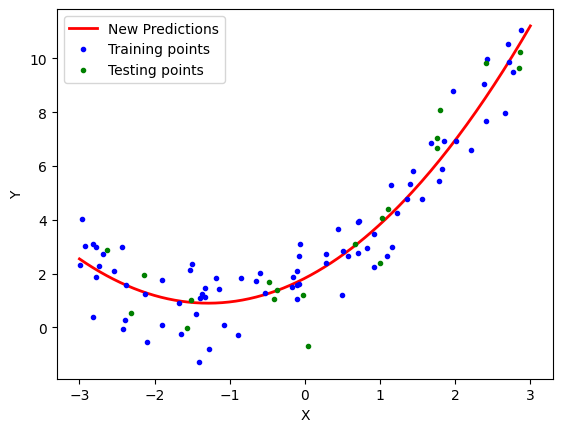

In [18]:
y_new = regression.predict(x_new_poly)
plt.plot(x_new,y_new,"r-",linewidth=2,label="New Predictions")
plt.plot(x_train,y_train,"b.",label='Training points')
plt.plot(x_test,y_test,"g.",label="Testing points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()